In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Timeseries objects in python

In [24]:
import datetime

Create a date range. Frequency alias are shown here: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [29]:
y = pd.Series(pd.date_range('2012', periods = 5, freq= 'YS'))

In [30]:
z = pd.Series([123,39,78,52,110])

In [32]:
y = pd.concat([y, z], axis = 1)

In [33]:
y.columns = ['Year', 'Observation']

In [35]:
y.head()

,Year,Observation
0,2012-01-01,123
1,2013-01-01,39
2,2014-01-01,78
3,2015-01-01,52
4,2016-01-01,110


## 2.2 Creating time plots

Datasets can be found here:
https://cran.r-project.org/web/packages/fpp/fpp.pdf

Datasets not located in the above link were extracted from fpp-package. 

In [119]:
melsyd = pd.read_csv("..\data\melsyd.csv")
melsyd.head()

,index,first_class,business_class,economy_class
0,1987-07-05,1.912,NaN,20.167
1,1987-07-12,1.848,NaN,20.161
2,1987-07-19,1.856,NaN,19.993
3,1987-07-26,2.142,NaN,20.986
4,1987-08-02,2.118,NaN,20.497


In [120]:
melsyd.columns

Index(['index', 'first_class', 'business_class', 'economy_class'], dtype='object')

To get into useful form in pandas, the date index needs to be converted to a datetime object then reindexed

In [121]:
melsyd['index'] = pd.to_datetime(melsyd['index'])

In [122]:
melsyd.set_index('index', inplace = True)

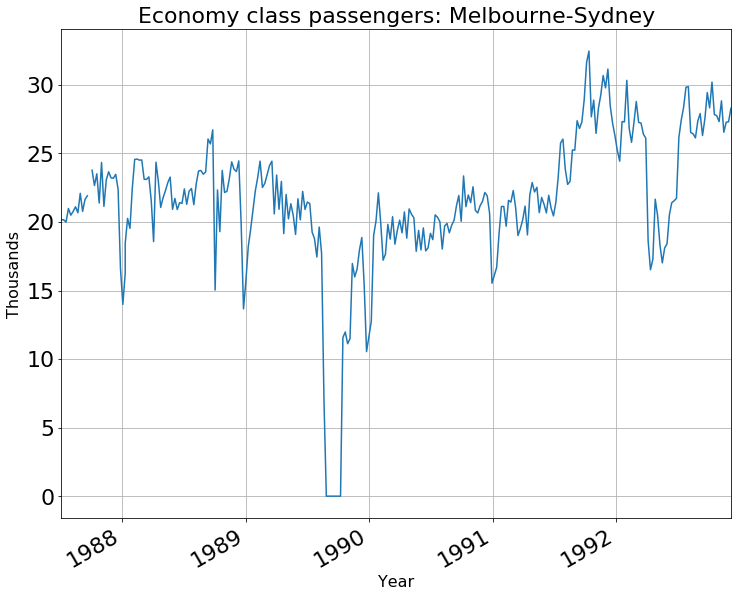

In [133]:
melsyd['economy_class'].plot(figsize = (12,10))

plt.xlabel("Year", fontsize=16)
plt.ylabel("Thousands", fontsize=16)
plt.title("Economy class passengers: Melbourne-Sydney", fontsize=22)
plt.grid(True)

Interesting features:
* Period in 1989 when no passengers were carried. Due to an industrial dispute
* Reduced load in 1992. When some economy class seats were replaced by business class seats
* Large increase in passenger load occured in second half of 1992
* Long term fluctuation in level of the series with increases in 1987, decreases in 1989 and increases again through 1990 and 1991. 
* Some periods of missing observations

In [205]:
a10 = pd.read_csv(r"..\data\a10.csv")

In [206]:
a10.head()

,index,value
0,1991 Jul,3.526591
1,1991 Aug,3.180891
2,1991 Sep,3.252221
3,1991 Oct,3.611003
4,1991 Nov,3.565869


In [207]:
a10['index'] = pd.to_datetime(a10['index'])

In [208]:
a10.set_index('index', inplace = True)

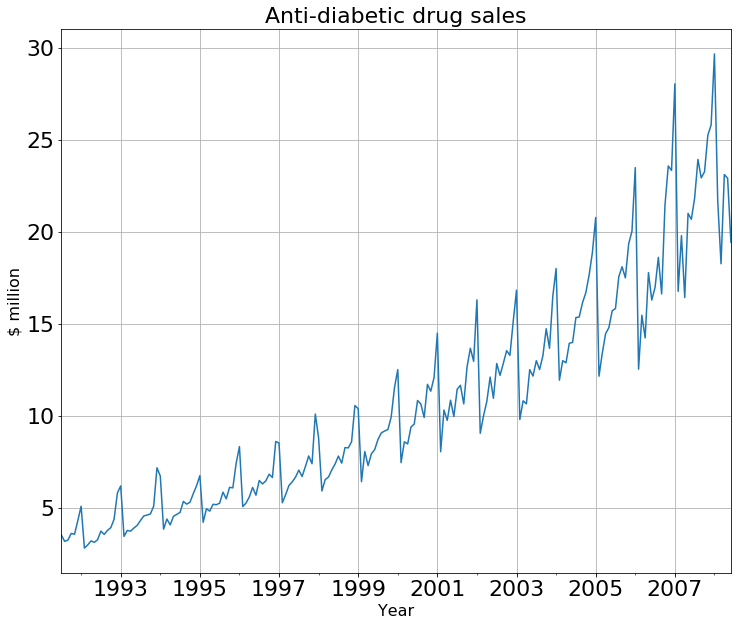

In [209]:
a10.plot(figsize = (12,10), legend=None)

plt.xlabel("Year", fontsize=16)
plt.ylabel("$ million", fontsize=16)
plt.title("Anti-diabetic drug sales", fontsize=22)
plt.grid(True)

Interesting features:
* Clear increasing trend
* Strong seasonal pattern that is increasing in size as the level of the series increases
* Large drop at the end of the calendar year

Any forecast needs to capture seasonal pattern and the fact the trend is slowly changing.

## 2.3 Time Series Patterns

Different patterns:
* Trend - a long term increase or decrease in data. Doesn't need to be linear
* Seasonal - seasonal factors influence the data. It is always of a fixed and known frequency. 
* Cyclic - exhibit rise and falls that are not of a fixed frequency. A trend can be a cyclic.

## 2.4 Seasonal plots

In [210]:
a10['year'], a10['month'] = a10.index.year, a10.index.month
a10_grouped = a10.groupby(['month','year'])[['value']].sum()

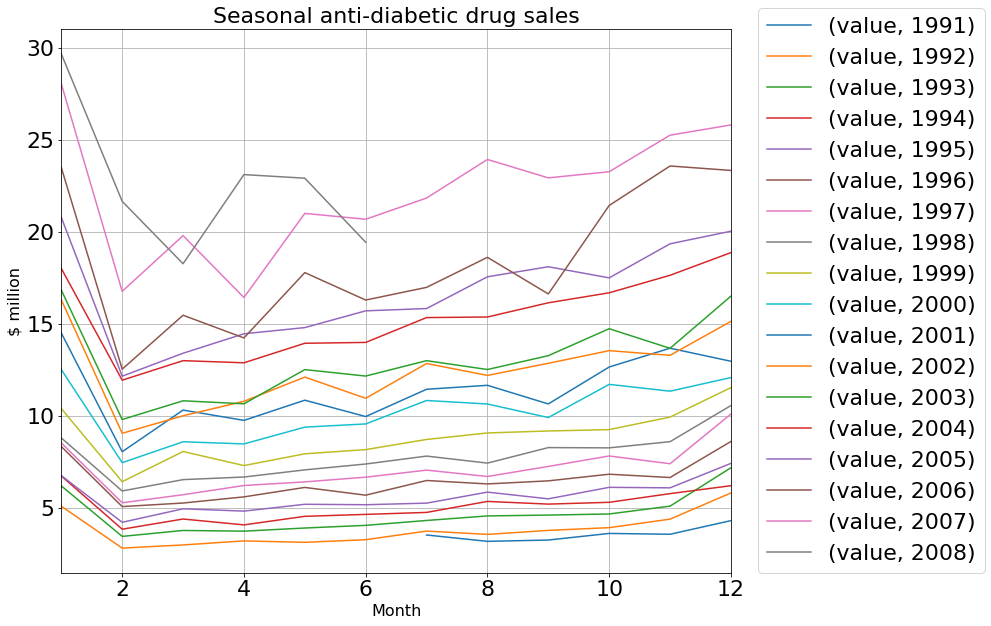

In [212]:
a10_grouped.unstack().plot(figsize = (12,10), legend=True)

plt.legend(loc=(1.04,0))
plt.xlabel("Month", fontsize=16)
plt.ylabel("$ million", fontsize=16)
plt.title("Seasonal anti-diabetic drug sales", fontsize=22)
plt.grid(True)

Interesting features:
* Large increase in sales at beginning o